# **차량 공유업체의 차량 파손 여부 분류하기**

## 0.미션

* 1) 미션1 : Data Preprocessing
    - **과제 수행 목표**
        - 본인의 구글 드라이브에 모델링 수행을 위해 적절한 폴더 및 파일로 **일관성 있게 정리**해야 합니다.
        - 제공된 데이터 : Car_Images.zip
            * Car_Images : 차량의 정상/파손 이미지 무작위 수집

* 2) 미션2 : CNN 모델링
    - **과제 수행 목표**
        - Tensorflow Keras를 이용하여 모델을 3개 이상 생성하세요.
            - 모델 구조와 파라미터는 자유롭게 구성하세요.
            - 단, 세부 목차에서 명시한 부분은 지켜주세요.

* 3) 미션3 : Data Argumentation & Transfer Learning
    - **과제 수행 목표**
        - 성능 개선을 위해 다음의 두가지를 시도하세요.
            * Data Augmentation을 적용하세요.(Image Generator)
            * Transfer Learning(VGG16)


## 1.환경설정 

### (1) 데이터셋 폴더 생성
- **세부요구사항**
    - C드라이브에 Datasets라는 폴더를 만드세요.
        - 구글드라이브를 사용하는경우 드라이브 첫 화면에 Datasets 라는 폴더를 만드세요. ('/content/drive/MyDrive/Datasets/')
    - 해당 폴더 안에 Car_Images.zip 파일을 넣으세요.

* 구글 Colab을 이용하는 경우

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np

### (2) 데이터셋 불러오기 
- **세부요구사항**
    - Car_Images.zip 파일을 C:/Datasets/ 경로에 압축 해제합니다.
    - zipfile 모듈을 이용하거나 다른 방식을 사용해도 됩니다.
        - 참고 자료 : [zipfile document](https://docs.python.org/3/library/zipfile.html#zipfile-objects)
    - 폴더구조(로컬)
        * C:/Datasets/ : 압축파일
        * C:/Datasets/Car_Images_train/ : 압축 해제한 이미지 저장소
    - 폴더구조(구글드라이브브)
        * /content/drive/MyDrive/Datasets/ : 압축파일
        * /content/drive/MyDrive/Datasets/Car_Images_train/ : 압축 해제한 이미지 저장소
    - 압축을 해제하면 다음과 같은 두 하위 폴더가 생성됩니다.
        * normal, abnormal : 각 폴더에는 이미지들이 있습니다.
        * 이후 단계에서 해당 경로로 부터 validation, test 셋을 추출하게 됩니다.
        

In [ ]:
import zipfile

In [ ]:
# 압축파일 경로
# 구글 드라이브인 경우 경로에 맞게 지정하세요.
dataset_path  = '/content/drive/MyDrive/Datasets/'
# dataset_path = 'C:/Datasets/'

file_path = dataset_path + 'Car_Images.zip'

In [ ]:
# 압축 해제
# zipfile.ZipFile('sample_all.zip').extractall(extractall_path)

# zipfile.ZipFile(file_path).extractall(dataset_path)

### (3) 이미지 저장을 위한 폴더 생성
- **세부요구사항**
    - train, validation, test 을 위해 각각 하위 폴더 normal과 abnormal를 준비합니다.
        - train
            * 정상 이미지 저장소 : C:/Datasets/Car_Images_train/normal/ 
                * 구글드라이브 :   /content/drive/MyDrive/Datasets/Car_Images_train/normal/
            * 파손 이미지 저장소 : C:/Datasets/Car_Images_train/abnormal/
                * 구글드라이브 : /content/drive/MyDrive/Datasets/Car_Images_train/abnormal/
        - val, test 역시 동일한 구조로 생성합니다.
    - 직접 탐색기에서 폴더를 생성할 수도 있고, os 모듈을 이용하여 코드로 작성할 수도 있습니다.
        - 참고 자료 : [os document](https://docs.python.org/3/library/os.html)

In [ ]:
# 각각 경로 지정
normal = "/content/drive/MyDrive/Datasets/Car_Images_train/normal/"
abnormal = "/content/drive/MyDrive/Datasets/Car_Images_train/abnormal/"
mainpath = "/content/drive/MyDrive/Datasets/Car_Images_train/"

In [ ]:
os.mkdir("/content/drive/MyDrive/Datasets/Car_Images_train/model/")
# train 폴더는 압축을 해제하면서 이미 생성 되어 있습니다.
os.mkdir("/content/drive/MyDrive/Datasets/Car_Images_train/model/train/")


# test 폴더 만들기 os.mkdir()
os.mkdir("/content/drive/MyDrive/Datasets/Car_Images_train/model/test/")

# validation 폴더 만들기

os.mkdir("/content/drive/MyDrive/Datasets/Car_Images_train/model/val/")

## 2.데이터 전처리

### (1) 데이터 분할 : Training set | Validation set | Test set 생성
- **세부요구사항**
    - Training set, Validation set, Test set을 만듭니다.
        * size
            * test : 전체에서 20%를 추출합니다.
            * validation : test를 떼어낸 나머지에서 다시 20%를 추출합니다.
        * 데이터는 랜덤하게 추출해야 합니다.
            - random, shutil 모듈을 이용하여 랜덤하게 추출할 수 있습니다.
                - [random document](https://docs.python.org/3/library/random.html) | [shutil document](https://docs.python.org/3/library/shutil.html)
            * 해당 모듈 이외에 자신이 잘 알고 있는 방법을 사용해도 됩니다.
---

#### 1) test, validation 크기를 지정

In [ ]:
import random, shutil

In [ ]:
tr_n_path = "/content/drive/MyDrive/Datasets/Car_Images_train/normal/"
tr_ab_path = "/content/drive/MyDrive/Datasets/Car_Images_train/abnormal/"

In [ ]:
# 전체 이미지 갯수를 확인합니다.

len_normal = len(os.listdir(normal))
len_abnormal = len(os.listdir(abnormal))
len_normal, len_abnormal

#### 2) test 셋 추출

In [ ]:
x = os.listdir(tr_n_path)
y = os.listdir(tr_ab_path)

In [ ]:
# random.seed(2023)
# # def my_partition(list_in, n):
#     np.random.seed(1)
#     idx = np.random.shuffle(list_in)
#     return [list_in[i::n] for i in range(n)]
import numpy as np

def TT_split(list_n, n):
    random.seed(2023)
    idx = np.random.shuffle(list_n)
    return [list_n[i::n] for i in range(n)]
# a_sub_b = [x for x in a if x not in b]
n_train = TT_split(x, round(len_normal*0.8))
n_test = [i for i in tr_n_path if i not in n_train]
ab_train  = TT_split(y, round(len_abnormal*0.8))
ab_test  = [i for i in tr_n_path if i not in ab_train]

len(n_train), len(n_test), len(ab_train), len(ab_test)

def TT_split(list_n)

In [ ]:
# 추출 후 이미지 갯수 확인




#### 3) validation 셋 추출

In [ ]:
x_val = TT_split(x, round(len(x_train)*0.2))
y_val = TT_split(x, round(len(x_train)*0.2))

len(x_val)

In [ ]:
# 추출 후 이미지 갯수 확인

In [ ]:
!pip install split-folders

### (2) 데이터 복사 및 이동
- **세부요구사항**
    - 분할된 데이터를 복사 이동합니다.
        - 새로운 폴더에 저장하는 데이터로 "3.모델링I"에서 사용합니다.
        - 기존 폴더는 "4.모델링II > (1) Data Augmentation"에서 사용합니다.
    - Training set | Validation set | Test set의 데이터를 **새로운 폴더**에 복사하세요.
        - 새로운 폴더 명
            * copy_images/trainset
            * copy_images/validset
            * copy_images/testset
        - 새로운 폴더에는 normal, abnormal 파일 모두를 복사합니다. 
            * 파일을 구분하기 위해 abnormal 파일들은 파일명 앞에 접두사 'ab_'를 붙입시다.
        - os, shutil 모듈을 활용하세요.

#### 1) abnormal 파일 복사

* 복사하기 : shutil.copytree()

In [ ]:
os.listdir(abnormal)

['ab_ab_ab_DALL·E 2023-03-10 23.37.30 - photo of a part of car without blemish.png',
 'ab_ab_ab_DALL·E 2023-03-10 18.54.17 - slightly damaged car.png',
 'ab_ab_ab_DALL·E 2023-03-10 23.34.08 - photo of a part of car without blemish.png',
 'ab_ab_ab_DALL·E 2023-03-10 23.39.41 - photo of a part of car without blemish.png',
 'ab_ab_ab_DALL·E 2023-03-10 18.51.26 - scratched car.png',
 'ab_ab_ab_DALL·E 2023-03-10 23.58.03 - a part of car without blemish.png',
 'ab_ab_ab_DALL·E 2023-03-11 00.03.13 - a part of car without blemish.png',
 'ab_ab_ab_DALL·E 2023-03-10 23.59.49 - a part of car without blemish.png',
 'ab_ab_ab_DALL·E 2023-03-10 18.51.24 - scratched car.png',
 'ab_ab_ab_DALL·E 2023-03-10 22.04.42 - scratched car.png',
 'ab_ab_ab_DALL·E 2023-03-10 23.44.29 - photo of a part of car without blemish.png',
 'ab_ab_ab_DALL·E 2023-03-10 23.57.31 - a part of car without blemish.png',
 'ab_ab_ab_DALL·E 2023-03-10 18.51.29 - scratched car.png',
 'ab_ab_ab_DALL·E 2023-03-11 00.14.22 - a part of

In [ ]:
import shutil
from distutils.dir_util import copy_tree

os.mkdir(mainpath + "allcopy/")
copy_tree(normal, (mainpath + "allcopy/"))
copy_tree(abnormal, (mainpath + "allcopy/"))
len(os.listdir("/content/drive/MyDrive/Datasets/Car_Images_train/allcopy/"))

* abnormal 이미지 이름의 접두어 "ab_" 붙이기 : os.rename

In [ ]:
import os
path = "/content/drive/MyDrive/Datasets/Car_Images_train/abnormal/"
for i in os.listdir(path):
    os.rename((path +i), (path +"ab_" + i))

In [ ]:
os.listdir("/content/drive/MyDrive/Datasets/Car_Images_train/abnormal")

['ab_ab_ab_ab_DALL·E 2023-03-10 23.37.30 - photo of a part of car without blemish.png',
 'ab_ab_ab_ab_DALL·E 2023-03-10 18.54.17 - slightly damaged car.png',
 'ab_ab_ab_ab_DALL·E 2023-03-10 23.34.08 - photo of a part of car without blemish.png',
 'ab_ab_ab_ab_DALL·E 2023-03-10 23.39.41 - photo of a part of car without blemish.png',
 'ab_ab_ab_ab_DALL·E 2023-03-10 18.51.26 - scratched car.png',
 'ab_ab_ab_ab_DALL·E 2023-03-10 23.58.03 - a part of car without blemish.png',
 'ab_ab_ab_ab_DALL·E 2023-03-11 00.03.13 - a part of car without blemish.png',
 'ab_ab_ab_ab_DALL·E 2023-03-10 23.59.49 - a part of car without blemish.png',
 'ab_ab_ab_ab_DALL·E 2023-03-10 18.51.24 - scratched car.png',
 'ab_ab_ab_ab_DALL·E 2023-03-10 22.04.42 - scratched car.png',
 'ab_ab_ab_ab_DALL·E 2023-03-10 23.44.29 - photo of a part of car without blemish.png',
 'ab_ab_ab_ab_DALL·E 2023-03-10 23.57.31 - a part of car without blemish.png',
 'ab_ab_ab_ab_DALL·E 2023-03-10 18.51.29 - scratched car.png',
 'ab_ab_ab

#### 2) normal 파일 복사

* 데이터 갯수 조회

In [ ]:
print(len(os.listdir(dataset_path+'copy_images/trainset/')))
print(len(os.listdir(dataset_path+'copy_images/validset/')))
print(len(os.listdir(dataset_path+'copy_images/testset/')))

In [ ]:
print(len(os.listdir("/content/drive/MyDrive/Datasets/Car_Images_train/train/train/normal/")))

### 파일 옮기기

In [ ]:
import shutil
allcopy = mainpath + "allcopy/"

# os.mkdir(mainpath + "model_data/")
destination = mainpath + "model_data"

### 참고: split folders
링크: https://yeko90.tistory.com/entry/splitfolders-how-to-use

자동으로 train, test, val 데이터 나눠줌


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

splitfolders.ratio(allcopy, output=destination, seed=2023, ratio=(.64,.16,.2))

## 3.모델링 I
* **세부요구사항**
    * 모델링을 위한 데이터 구조 만들기
        * x : 이미지를 array로 변환합니다.
        * y : 이미지 갯수만큼 normal - 0, abnormal - 1 로 array를 만듭니다.
    * 모델을 최소 3개 이상 만들고 성능을 비교합니다.
        * 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
        * 전처리 과정에서 생성한 Validation set을 적절하게 사용하세요.
        * Early Stopping을 반드시 사용하세요.
            * 최적의 가중치를 모델에 적용하세요.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

### (1) X : image to array
- **세부요구사항**
    * 모델링을 위해서는 np.array 형태로 데이터셋을 만들어야 합니다.
    * Training set / Validation set / Test set의 X는 이미지 형태로 되어있습니다. 
    * 이미지 파일을 불러와 train, valid, test 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

#### 1) 이미지 목록 만들기
* train, validation, test 폴더로 부터 이미지 목록을 생성합니다.

In [ ]:
modelpath = mainpath + "model_data/"
modelpath

'/content/drive/MyDrive/Datasets/Car_Images_train/model_data/'

In [ ]:
train_list = [] 
val_list = []
test_list = []

In [ ]:
# 이미지 목록 저장
temp_train_list = os.listdir(modelpath + "train/allcopy/")
temp_val_list = os.listdir(modelpath + "val/allcopy/")
temp_test_list = os.listdir(modelpath + "test/allcopy/")


for i in temp_train_list:
    train_list.append(modelpath + "train/allcopy/" + i)
for i in temp_val_list:
    val_list.append(modelpath + "val/allcopy/" + i)
for i in temp_test_list:
    test_list.append(modelpath + "test/allcopy/" + i)

train_list[:5]

['/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/allcopy/DALL·E 2023-03-10 18.52.44 - photo of a part of car.png',
 '/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/allcopy/DALL·E 2023-03-10 18.50.29 - photo of a part of car.png',
 '/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/allcopy/DALL·E 2023-03-10 18.52.17 - photo of a part of car.png',
 '/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/allcopy/DALL·E 2023-03-10 18.52.40 - photo of a part of car.png',
 '/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/allcopy/DALL·E 2023-03-10 22.07.07 - photo of a part of car.png']

In [ ]:
# 메모리, 처리시간을 위해서 이미지 크기 조정
img_size = 280 ## 사이즈 조정 가능

#### 2) 이미지들을 배열 데이터셋으로 만들기

In [ ]:
from PIL import Image

# train 데이터 배열 데이터셋화

train = []
for i in train_list:
    img = Image.open(i)
    img = img.resize((img_size, img_size))
    train.append(np.array(img))
train = np.array(train)
train.shape

(387, 280, 280, 3)

In [ ]:
# val 데이터 배열 데이터셋화

val = []
for i in val_list:
    img = Image.open(i)
    img = img.resize((img_size, img_size))
    val.append(np.array(img))
val = np.array(val)
val.shape

(96, 280, 280, 3)

In [ ]:
# test 데이터 배열 데이터셋화

test = []
for i in test_list:
    img = Image.open(i)
    img = img.resize((img_size, img_size))
    test.append(np.array(img))
test = np.array(test)
test.shape

(122, 280, 280, 3)

- img_path = tr_path + img

### (2) y : 클래스 만들기
- **세부요구사항**
    - Training set / Validation set / Test set의 y를 생성합니다.
        - 각각 normal, abnormal 데이터의 갯수를 다시 확인하고
        - normal을 0, abnormal을 1로 지정합니다.

In [ ]:
# 데이터 갯수 확인
print( len(temp_train_list) )
print( len([val for val in temp_train_list if val.startswith('ab_')]) )
print('---')
print( len(temp_val_list) )
print( len([val for val in temp_val_list if val.startswith('ab_')]) )
print('---')
print( len(temp_test_list) )
print( len([val for val in temp_test_list if val.startswith('ab_')]) )

387
195
---
96
52
---
122
56


* y_train, y_valid, y_test 만들기
    * normal, abnormal 데이터의 갯수를 다시 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [ ]:
train_label = np.array([1 if i.startswith('ab_') else 0 for i in temp_train_list ])
val_label = np.array([1 if i.startswith('ab_') else 0 for i in temp_val_list ])
test_label = np.array([1 if i.startswith('ab_') else 0 for i in temp_test_list ])

len(train_label), len(val_label), len(test_label)

(387, 96, 122)

In [ ]:
x_train = train.copy()
x_val = val.copy()
x_test = test.copy()

y_train = train_label.copy()
y_val = val_label.copy()
y_test = test_label.copy()

In [ ]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((387, 280, 280, 3),
 (96, 280, 280, 3),
 (122, 280, 280, 3),
 (387,),
 (96,),
 (122,))

In [ ]:
from tensorflow.keras.utils import to_categorical

class_n = len(np.unique(y_train))

y_train_ss = to_categorical(y_train, class_n)
y_val_ss = to_categorical(y_val, class_n)
y_test_ss = to_categorical(y_test, class_n)

y_train_ss.shape

(387, 2)

### x 표준화

In [ ]:
x_train.shape

(387, 280, 280, 3)

In [ ]:
mean_v, std_v = x_train.mean(), x_train.std()
x_train_ss = (x_train - mean_v) / std_v
x_val_ss = (x_val - mean_v) / std_v
x_test_ss = (x_test - mean_v) / std_v

x_train_ss.mean(), x_train_ss.std()

(-1.9809115627195397e-17, 0.9999999999999973)

In [ ]:
x_train_ss.shape, y_train.shape

((387, 280, 280, 3), (387,))

### (3) 모델1
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

#### 1) 구조 설계

In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# ## Sequential API
# 1. sesion clear
keras.backend.clear_session()


# 2. model structure
model = keras.models.Sequential()


# 3. model assembly
model.add(keras.layers.Input(shape=(280, 280, 3)))
#     # 1. 인풋 레이어
model.add(keras.layers.Conv2D(filters=32, kernel_size=(2, 2)))
#     # 2. Convolution : 필터수 32개, 사이즈(2, 2), same padding
model.add(keras.layers.Conv2D(filters=32,            # 새롭게 제작할 feature map의 수
                              kernel_size=(2, 2),    # 훑는 필터의 가로세로 사이즈
                              padding='same',        # 필터가 훑기 이전 사이즈를 유지하는 기법
                              strides=(1, 1),        # 기본적으로 한 칸씩 이동하며 훑음
                              activation='relu'))    # 주의!
#     # 3. BatchNormalization
model.add(keras.layers.BatchNormalization())
#     # 4. Convolution : 필터수 32개, 사이즈(2, 2), same padding
model.add(keras.layers.Conv2D(filters=32,            # 새롭게 제작할 feature map의 수
                              kernel_size=(2, 2),    # 훑는 필터의 가로세로 사이즈
                              padding='same',        # 필터가 훑기 이전 사이즈를 유지하는 기법
                              strides=(1, 1),        # 기본적으로 한 칸씩 이동하며 훑음
                              activation='relu'))    # 주의!
#     # 5. BatchNormalization
model.add(keras.layers.BatchNormalization())
#     # 6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add(keras.layers.MaxPool2D(pool_size=(2,2), # pooling filter의 가로세로 사이즈
                                 strides=(2,2)))  # pooling filter가 어떻게 이동할 것인지
#     # 7. DropOut : 25% 비활성화
model.add(keras.layers.Dropout(0.25))
#     # 8. Convolution : 필터수 64개, 사이즈(2, 2), same padding
model.add(keras.layers.Conv2D(filters=64,            # 새롭게 제작할 feature map의 수
                              kernel_size=(2, 2),    # 훑는 필터의 가로세로 사이즈
                              padding='same',        # 필터가 훑기 이전 사이즈를 유지하는 기법
                              strides=(1, 1),        # 기본적으로 한 칸씩 이동하며 훑음
                              activation='relu'))    # 주의!
#     # 9. BatchNormalization
model.add(keras.layers.BatchNormalization())
#     # 10. Convolution : 필터수 64개, 사이즈(2, 2), same padding
model.add(keras.layers.Conv2D(filters=64,            # 새롭게 제작할 feature map의 수
                              kernel_size=(2, 2),    # 훑는 필터의 가로세로 사이즈
                              padding='same',        # 필터가 훑기 이전 사이즈를 유지하는 기법
                              strides=(1, 1),        # 기본적으로 한 칸씩 이동하며 훑음
                              activation='relu'))    # 주의!
#     # 11. BatchNormalization
model.add(keras.layers.BatchNormalization())
#     # 12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
#     # 13. DropOut : 25% 비활성화
model.add(keras.layers.Dropout(0.25))
#     # 14. Flatten
model.add(keras.layers.Flatten())
#     # 15. Fully Connected Layer : 노드 512개
model.add(keras.layers.Dense(1024, activation='relu'))
#     # 16. BatchNormalization
model.add(keras.layers.BatchNormalization())
#     # 17. 아웃풋 레이어
model.add(keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 279, 279, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 279, 279, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 279, 279, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 279, 279, 32)      4128      
                                                                 
 batch_normalization_1 (Batc  (None, 279, 279, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 139, 139, 32)     0

#### 2) 학습
* EarlyStopping 설정하고 학습시키기

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=6,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
history = model.fit(x_train
                    , y_train_ss, epochs=1000, verbose=1,
                    validation_data = (x_val, y_val_ss), callbacks=[es], batch_size=64)

Epoch 1/1000
7/7 [==============================] - 38s 5s/step - loss: 1.1624 - accuracy: 0.7804 - val_loss: 180.1439 - val_accuracy: 0.4583
Epoch 2/1000
7/7 [==============================] - 33s 5s/step - loss: 0.5897 - accuracy: 0.8579 - val_loss: 76.9196 - val_accuracy: 0.4583
Epoch 3/1000
7/7 [==============================] - 33s 5s/step - loss: 0.3656 - accuracy: 0.8863 - val_loss: 26.6565 - val_accuracy: 0.4583
Epoch 4/1000
7/7 [==============================] - 34s 5s/step - loss: 0.3542 - accuracy: 0.8811 - val_loss: 12.2667 - val_accuracy: 0.4792
Epoch 5/1000
7/7 [==============================] - 33s 5s/step - loss: 0.2485 - accuracy: 0.9173 - val_loss: 14.8979 - val_accuracy: 0.4583
Epoch 6/1000
7/7 [==============================] - 34s 5s/step - loss: 0.1509 - accuracy: 0.9432 - val_loss: 10.8338 - val_accuracy: 0.4896
Epoch 7/1000
7/7 [==============================] - 33s 5s/step - loss: 0.1163 - accuracy: 0.9716 - val_loss: 7.1153 - val_accuracy: 0.5000
Epoch 8/1000


#### 3) test set으로 예측하고 평가하기
* 평가는 confusion_matrix, classification_report 활용

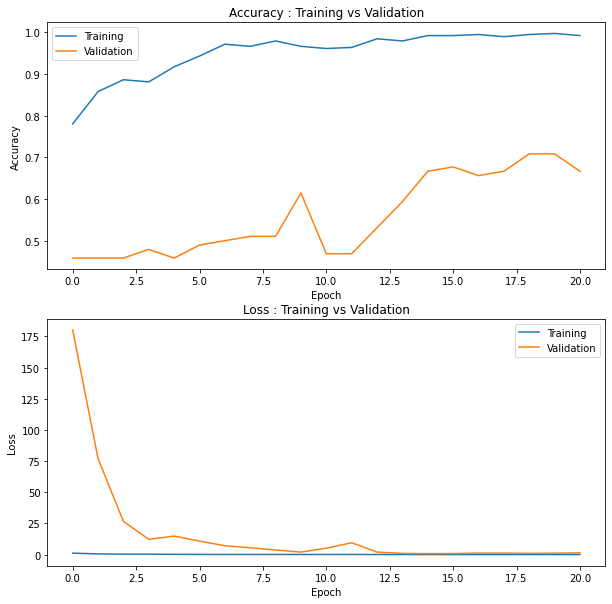

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred_s = y_pred.argmax(axis=1)
y_pred_s.shape, y_pred_s[:30]

4/4 [==============================] - 2s 368ms/step


((122,),
 array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 1]))

In [ ]:
y_test[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# confusion matrix, accuracy, recall, precision, f1 score
from sklearn.metrics import *

print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_s))
print("accuracy_score:", accuracy_score(y_test, y_pred_s))
print("recall_score:", recall_score(y_test, y_pred_s))
print("precision_score:", precision_score(y_test, y_pred_s))
print("f1_score:", f1_score(y_test, y_pred_s))

confusion_matrix: 
 [[40 26]
 [ 7 49]]
accuracy_score: 0.7295081967213115
recall_score: 0.875
precision_score: 0.6533333333333333
f1_score: 0.7480916030534351


In [ ]:
len(x_test), len(y_test)

(122, 122)

id = 101
모델의 카테고리별 확률 : 
{'normal': 100.0, 'abnormal': 0.0}


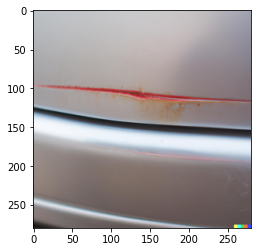

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''
import random as rd

labels = {0: "normal", 1: "abnormal"}
id = rd.randrange(0,121)

print(f'id = {id}')

prob = np.floor(y_pred[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)


plt.imshow(x_test[id])
plt.show()

### (4) 모델2
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

#### 1) 구조 설계

In [ ]:
# 1. session clear
clear_session()

# 2. layer chaining
il = Input(shape=(280, 280, 3))

hl = Conv2D(filters=28,
            kernel_size = (4, 4),
            strides = (2, 2),
            padding = 'same',
            activation = 'relu')(il)
hl = Conv2D(filters=28,
            kernel_size = (4, 4),
            strides = (2, 2),
            padding = 'same',
            activation = 'relu')(hl)
            
hl = BatchNormalization()(hl)
hl = MaxPool2D(pool_size = (2, 2), strides = (2, 2))(hl)
hl = Dropout(0.3)(hl)

hl = Conv2D(filters=48,
            kernel_size = (3, 3),
            strides = (2, 2),
            padding = 'same',
            activation = 'relu')(hl)
hl = Conv2D(filters=48,
            kernel_size = (3, 3),
            strides = (2, 2),
            padding = 'same',
            activation = 'relu')(hl)

hl = BatchNormalization()(hl)
hl = MaxPool2D(pool_size = (2, 2), strides = (2, 2))(hl)
hl = Dropout(0.25)(hl)

hl = Flatten()(hl)
hl = Dense(1024, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.2)(hl)

ol = Dense(2, activation = "softmax")(hl)
# 3. set model's start and end
model_seq = Model(il, ol)

# 4. compile
model_seq.compile(loss = 'categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())


# 5. summary
model_seq.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 140, 140, 28)      1372      
                                                                 
 conv2d_1 (Conv2D)           (None, 70, 70, 28)        12572     
                                                                 
 batch_normalization (BatchN  (None, 70, 70, 28)       112       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 28)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 35, 35, 28)        0     

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=16,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
hist = model_seq.fit(x_train, y_train_ss, epochs=10000, verbose=1,
                    validation_split=0.2, callbacks=[es], batch_size=64)

Epoch 1/10000
5/5 [==============================] - 0s 87ms/step - loss: 0.0685 - accuracy: 0.9773 - val_loss: 1.2668 - val_accuracy: 0.5385
Epoch 2/10000
5/5 [==============================] - 0s 56ms/step - loss: 0.0500 - accuracy: 0.9871 - val_loss: 2.9800 - val_accuracy: 0.1410
Epoch 3/10000
5/5 [==============================] - 0s 55ms/step - loss: 0.0508 - accuracy: 0.9838 - val_loss: 3.0343 - val_accuracy: 0.1538
Epoch 4/10000
5/5 [==============================] - 0s 56ms/step - loss: 0.0531 - accuracy: 0.9806 - val_loss: 2.3134 - val_accuracy: 0.2308
Epoch 5/10000
5/5 [==============================] - 0s 59ms/step - loss: 0.0310 - accuracy: 0.9935 - val_loss: 3.0440 - val_accuracy: 0.1410
Epoch 6/10000
5/5 [==============================] - 0s 56ms/step - loss: 0.0265 - accuracy: 0.9903 - val_loss: 2.9453 - val_accuracy: 0.1410
Epoch 7/10000
5/5 [==============================] - 0s 55ms/step - loss: 0.0404 - accuracy: 0.9838 - val_loss: 2.8052 - val_accuracy: 0.2308
Epoch 

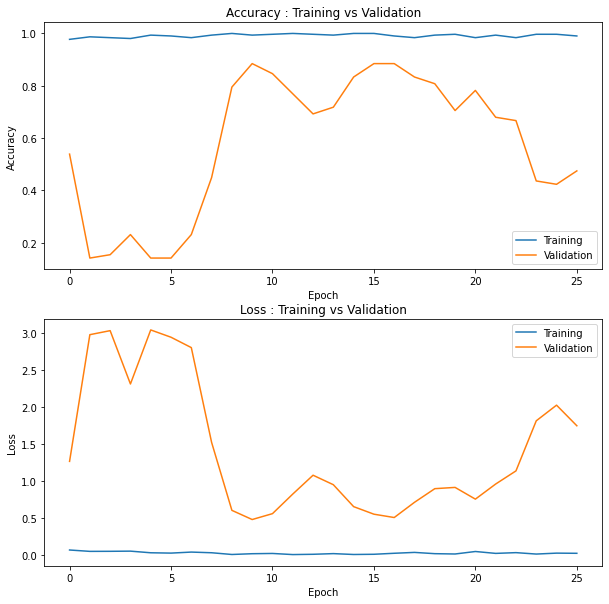

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(212)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred_s = y_pred.argmax(axis=1)
y_pred_s.shape, y_pred_s[:5]

4/4 [==============================] - 0s 70ms/step


((122,), array([0, 0, 1, 0, 1]))

In [ ]:
y_test[:5]

array([0, 0, 0, 0, 0])

In [ ]:
# confusion matrix, accuracy, recall, precision, f1 score
from sklearn.metrics import *

print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_s))
print("accuracy_score:", accuracy_score(y_test, y_pred_s))
print("recall_score:", recall_score(y_test, y_pred_s))
print("precision_score:", precision_score(y_test, y_pred_s))
print("f1_score:", f1_score(y_test, y_pred_s))

confusion_matrix: 
 [[28 38]
 [ 2 54]]
accuracy_score: 0.6721311475409836
recall_score: 0.9642857142857143
precision_score: 0.5869565217391305
f1_score: 0.7297297297297297


In [ ]:
len(x_test), len(y_test)

(122, 122)

id = 33
모델의 카테고리별 확률 : 
{'normal': 0.0, 'abnormal': 99.0}


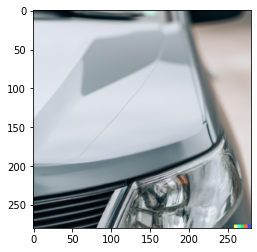

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''
import random as rd

labels = {0: "normal", 1: "abnormal"}
id = rd.randrange(0,121)

print(f'id = {id}')

prob = np.floor(y_pred[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)


plt.imshow(x_test[id])
plt.show()

#### 3) test set으로 예측하고 평가하기
* 평가는 confusion_matrix, classification_report 활용

## 4.모델링 II
* **세부요구사항**
    - 성능을 높이기 위해서 다음의 두가지를 시도해 봅시다.
        - Data Augmentation을 통해 데이터를 증가 시킵니다.
            - ImageDataGenerator를 사용합니다.
        - 사전 학습된 모델(Transfer Learning)을 가져다 사용해 봅시다.
            - VGG16(이미지넷)을 사용해 봅시다.

### (1) Data Augmentation
- **세부요구사항**
    * 모델 학습에 이용할 이미지 데이터를 증강시키세요.
    * Keras의 ImageDataGenerator를 이용
        - [ImageDataGenerator document](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

    * image generator를 이용하여 학습
        * 모델 구조는 이미 생성한 1,2,3 중 하나를 선택하여 학습


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
mainpath

'/content/drive/MyDrive/Datasets/Car_Images_train/'

In [ ]:
img_size = 280 ## 사이즈 조정 가능
dataset_path = mainpath + "model_data/"
train_path = dataset_path+'train/allcopy/'
valid_path = dataset_path+'val/allcopy/'
test_path = dataset_path + 'test/allcopy/'

#### 1) ImageGenerator 생성
* ImageDataGenerator 함수 사용
    * 주요 옵션
        * rotation_range: 무작위 회전을 적용할 각도 범위
        * zoom_range: 무작위 줌을 적용할 범위 [1-zoom_range, 1+zoom_range]
        * horizontal_flip: 무작위 좌우반전을 적용할지 여부
        * vertical_flip: 무작위 상하반전을 적용할지 여부
        * rescale: 텐서의 모든 값을 rescale 값으로 나누어줌 (이 경우에는 255로 나누어서 0~1사이의 값으로 변경)

In [ ]:
train_datagen = 

valid_datagen = 


#### 1.1) openCV - CLAHE 생성


In [ ]:
# os.mkdir("/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/cv2/")
cv2_path = "/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/cv2/"

In [ ]:
trainv2_path = "/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/cv2/"
valv2_path = "/content/drive/MyDrive/Datasets/Car_Images_train/model_data/val/cv2/"
testv2_path = "/content/drive/MyDrive/Datasets/Car_Images_train/model_data/test/cv2/"

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow



def clahe(path, path2):

    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img2 = clahe.apply(img)

    cv2.imwrite((path2 + i), img2)

for i in os.listdir(train_path):
    clahe((train_path + i), trainv2_path)
for i in os.listdir(valid_path):
    clahe((valid_path + i), valv2_path)
for i in os.listdir(test_path):
    clahe((test_path + i), testv2_path)

### - Val 데이터에도 같은 처리

In [ ]:
os.mkdir("/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/cv2/")
os.mkdir("/content/drive/MyDrive/Datasets/Car_Images_train/model_data/test/cv2/")
os.mkdir("/content/drive/MyDrive/Datasets/Car_Images_train/model_data/val/cv2/")

In [ ]:
def cv2maker(path):
    for i in os.listdir(path):
        clahe((path + i))

cv2maker(trainv2_path)
cv2maker(valv2_path)
cv2maker(testv2_path)

### - test 데이터에도 같은 처리

In [ ]:
cv2_path = "/content/drive/MyDrive/Datasets/Car_Images_train/model_data/test/cv2/"

In [ ]:
val_path = "/content/drive/MyDrive/Datasets/Car_Images_train/model_data/test/allcopy/"

for i in os.listdir(val_path):
    clahe((val_path + i))

In [ ]:
train_path = "/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/allcopy/"
os.mkdir("/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/cv2/")
for i in os.listdir(val_path):
    clahe((val_path + i))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

aug = ImageDataGenerator(rotation_range=30,      # 이미지 회전
                         width_shift_range=0.1,  # 이미지 좌우 이동
                         height_shift_range=0.1, # 이미지 상하 이동
                         zoom_range=0.2,         # 확대/축소 범위
                         shear_range=0.2,        # 비스듬히 늘림
                         horizontal_flip=True,   # 가로 전환
                         vertical_flip=True,     # 세로 전환           
                         fill_mode='nearest')    # 마지막 옵션 주의하자. 이미지 회전, 이동, 축소할 때 발생하는 공간을 채우는 방식

### trainset

In [ ]:
newtrain = "/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/cv2/"
os.mkdir("/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/cv2_generated/")
saveto = "/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/cv2_generated/"
for i in os.listdir(newtrain):
    
    img = load_img(newtrain + i)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    imageGen = aug.flow(img, # 이미지 어레이를 받아서.
                        batch_size=1,
                        save_to_dir= saveto,
                        save_prefix='',
                        save_format='png' )
    
total = 0
for image in imageGen:
    total += 1
    if total == len(os.listdir(newtrain)):
        break

### validset

In [ ]:
newval = "/content/drive/MyDrive/Datasets/Car_Images_train/model_data/val/cv2/"
# os.mkdir("/content/drive/MyDrive/Datasets/Car_Images_train/model_data/val/cv2_generated/")
saveto = "/content/drive/MyDrive/Datasets/Car_Images_train/model_data/val/cv2_generated/"
for i in os.listdir(newval):
    
    img = load_img(newval + i)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    imageGen = aug.flow(img, # 이미지 어레이를 받아서.
                        batch_size=1,
                        save_to_dir= saveto,
                        save_prefix='',
                        save_format='png' )
    
total = 0
for image in imageGen:
    total += 1
    if total == len(os.listdir(newval)):
        break

### testset

In [ ]:
newtest = "/content/drive/MyDrive/Datasets/Car_Images_train/model_data/test/cv2/"
# os.mkdir("/content/drive/MyDrive/Datasets/Car_Images_train/model_data/test/cv2_generated/")
saveto = "/content/drive/MyDrive/Datasets/Car_Images_train/model_data/test/cv2_generated/"
for i in os.listdir(newtest):
    
    img = load_img(newtest + i)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    imageGen = aug.flow(img, # 이미지 어레이를 받아서.
                        batch_size=1,
                        save_to_dir= saveto,
                        save_prefix='image',
                        save_format='png' )

In [ ]:
total = 0
for image in imageGen:
    total += 1
    if total == len(os.listdir(newtest)):
        break


#### 2) 경로로 부터 이미지 불러 올 준비
* .flow_from_directory 이용
    * 디렉토리에서 이미지를 가져와서 데이터 증강을 적용하고 batch 단위로 제공하는 generator를 생성합니다.
    * 이미지를 불러올 때 target_size로 크기를 맞추고, 
    * class_mode로 이진 분류(binary)를 수행하도록 지정합니다.


In [ ]:
train_generator = 

valid_generator = 


#### 3) 학습
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 train_generator 이용. 
    - validation_data = valid_generator 지정
    - Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

* 구조 설계

#### 1) 이미지 목록 만들기
* train, validation, test 폴더로 부터 이미지 목록을 생성합니다.

In [ ]:
modelpath = mainpath + "model_data/"
modelpath

'/content/drive/MyDrive/Datasets/Car_Images_train/model_data/'

In [ ]:
train_list = [] 
# val_list = []
# test_list = []

In [ ]:
# 이미지 목록 저장
temp_train_list = os.listdir(modelpath + "train/cv2/")
# temp_val_list = os.listdir(modelpath + "val/cv2/")
# temp__test_list = os.listdir(modelpath + "test/cv2/")


for i in temp_train_list:
    train_list.append(modelpath + "train/cv2/" + i)
# for i in temp_val_list:
#     val_list.append(modelpath + "val/cv2/" + i)
# for i in temp_test_list:
#     test_list.append(modelpath + "test/cv2/" + i)

train_list[:5]

['/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/cv2/DALL·E 2023-03-10 18.52.44 - photo of a part of car.png',
 '/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/cv2/DALL·E 2023-03-10 18.50.29 - photo of a part of car.png',
 '/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/cv2/DALL·E 2023-03-10 18.52.17 - photo of a part of car.png',
 '/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/cv2/DALL·E 2023-03-10 18.52.40 - photo of a part of car.png',
 '/content/drive/MyDrive/Datasets/Car_Images_train/model_data/train/cv2/DALL·E 2023-03-10 22.07.07 - photo of a part of car.png']

In [ ]:
# 메모리, 처리시간을 위해서 이미지 크기 조정
img_size = 280 ## 사이즈 조정 가능

#### 2) 이미지들을 배열 데이터셋으로 만들기

In [ ]:
from PIL import Image

# train 데이터 배열 데이터셋화

train = []
for i in train_list:
    img = Image.open(i)
    img = img.resize((img_size, img_size))
    train.append(np.array(img))
train = np.array(train)
train.shape

(387, 280, 280)

In [ ]:
# val 데이터 배열 데이터셋화

val = []
for i in val_list:
    img = Image.open(i)
    img = img.resize((img_size, img_size))
    val.append(np.array(img))
val = np.array(val)
val.shape

(96, 280, 280, 3)

In [ ]:
# test 데이터 배열 데이터셋화

test = []
for i in test_list:
    img = Image.open(i)
    img = img.resize((img_size, img_size))
    test.append(np.array(img))
test = np.array(test)
test.shape

(122, 280, 280, 3)

- img_path = tr_path + img

### (2) y : 클래스 만들기
- **세부요구사항**
    - Training set / Validation set / Test set의 y를 생성합니다.
        - 각각 normal, abnormal 데이터의 갯수를 다시 확인하고
        - normal을 0, abnormal을 1로 지정합니다.

In [ ]:
# 데이터 갯수 확인
print( len(temp_train_list) )
print( len([val for val in temp_train_list if val.startswith('ab_')]) )
print('---')
print( len(temp_val_list) )
print( len([val for val in temp_val_list if val.startswith('ab_')]) )
print('---')
print( len(temp_test_list) )
print( len([val for val in temp_test_list if val.startswith('ab_')]) )

387
195
---
96
52
---
122
56


* y_train, y_valid, y_test 만들기
    * normal, abnormal 데이터의 갯수를 다시 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [ ]:
train_label = np.array([1 if i.startswith('ab_') else 0 for i in temp_train_list ])
# val_label = np.array([1 if i.startswith('ab_') else 0 for i in temp_val_list ])
# test_label = np.array([1 if i.startswith('ab_') else 0 for i in temp_test_list ])

len(train_label), len(val_label), len(test_label)

(387, 96, 122)

In [ ]:
x_train = train.copy()
# x_val = val.copy()
# x_test = test.copy()

y_train = train_label.copy()
# y_val = val_label.copy()
# y_test = test_label.copy()

In [ ]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((387, 280, 280), (96, 280, 280, 3), (122, 280, 280, 3), (387,), (96,), (122,))

In [ ]:
from tensorflow.keras.utils import to_categorical

class_n = len(np.unique(y_train))

y_train_ss = to_categorical(y_train, class_n)
# y_val_ss = to_categorical(y_val, class_n)
# y_test_Ss = to_categorical(y_test, class_n)

y_train_ss.shape

(387, 2)

### x 표준화

In [ ]:
x_train.shape

(387, 280, 280)

In [ ]:
_, h, w = x_train.shape

print(h, w)

280 280


In [ ]:
x_train = x_train.reshape(x_train.shape[0], h, w, 1)


print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(387, 280, 280, 1) (387,) (122, 280, 280, 3) (122,)


In [ ]:
mean_v, std_v = x_train.mean(), x_train.std()
x_train_ss = (x_train - mean_v) / std_v
# x_val_ss = (x_val - mean_v) / std_v
# x_test_ss = (x_test - mean_v) / std_v

x_train_ss.mean(), x_train_ss.std()

(-2.77907154067685e-16, 0.9999999999999994)

In [ ]:
x_train_ss.shape, y_train.shape

((387, 280, 280, 1), (387,))

### (3) 모델1
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

#### 1) 구조 설계

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# ## Sequential API
# 1. sesion clear
keras.backend.clear_session()


# 2. model structure
model = keras.models.Sequential()


# 3. model assembly
model.add(keras.layers.Input(shape=(280, 280, 3)))
#     # 1. 인풋 레이어
model.add(keras.layers.Conv2D(filters=32, kernel_size=(2, 2)))
#     # 2. Convolution : 필터수 32개, 사이즈(2, 2), same padding
model.add(keras.layers.Conv2D(filters=32,            # 새롭게 제작할 feature map의 수
                              kernel_size=(2, 2),    # 훑는 필터의 가로세로 사이즈
                              padding='same',        # 필터가 훑기 이전 사이즈를 유지하는 기법
                              strides=(1, 1),        # 기본적으로 한 칸씩 이동하며 훑음
                              activation='relu'))    # 주의!
#     # 3. BatchNormalization
model.add(keras.layers.BatchNormalization())
#     # 4. Convolution : 필터수 32개, 사이즈(2, 2), same padding
model.add(keras.layers.Conv2D(filters=32,            # 새롭게 제작할 feature map의 수
                              kernel_size=(2, 2),    # 훑는 필터의 가로세로 사이즈
                              padding='same',        # 필터가 훑기 이전 사이즈를 유지하는 기법
                              strides=(1, 1),        # 기본적으로 한 칸씩 이동하며 훑음
                              activation='relu'))    # 주의!
#     # 5. BatchNormalization
model.add(keras.layers.BatchNormalization())
#     # 6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add(keras.layers.MaxPool2D(pool_size=(2,2), # pooling filter의 가로세로 사이즈
                                 strides=(2,2)))  # pooling filter가 어떻게 이동할 것인지
#     # 7. DropOut : 25% 비활성화
model.add(keras.layers.Dropout(0.25))
#     # 8. Convolution : 필터수 64개, 사이즈(2, 2), same padding
model.add(keras.layers.Conv2D(filters=64,            # 새롭게 제작할 feature map의 수
                              kernel_size=(2, 2),    # 훑는 필터의 가로세로 사이즈
                              padding='same',        # 필터가 훑기 이전 사이즈를 유지하는 기법
                              strides=(1, 1),        # 기본적으로 한 칸씩 이동하며 훑음
                              activation='relu'))    # 주의!
#     # 9. BatchNormalization
model.add(keras.layers.BatchNormalization())
#     # 10. Convolution : 필터수 64개, 사이즈(2, 2), same padding
model.add(keras.layers.Conv2D(filters=64,            # 새롭게 제작할 feature map의 수
                              kernel_size=(2, 2),    # 훑는 필터의 가로세로 사이즈
                              padding='same',        # 필터가 훑기 이전 사이즈를 유지하는 기법
                              strides=(1, 1),        # 기본적으로 한 칸씩 이동하며 훑음
                              activation='relu'))    # 주의!
#     # 11. BatchNormalization
model.add(keras.layers.BatchNormalization())
#     # 12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
#     # 13. DropOut : 25% 비활성화
model.add(keras.layers.Dropout(0.25))
#     # 14. Flatten
model.add(keras.layers.Flatten())
#     # 15. Fully Connected Layer : 노드 512개
model.add(keras.layers.Dense(1024, activation='relu'))
#     # 16. BatchNormalization
model.add(keras.layers.BatchNormalization())
#     # 17. 아웃풋 레이어
model.add(keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 279, 279, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 279, 279, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 279, 279, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 279, 279, 32)      4128      
                                                                 
 batch_normalization_1 (Batc  (None, 279, 279, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 139, 139, 32)     0

#### 2) 학습
* EarlyStopping 설정하고 학습시키기

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=6,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
history = model.fit(x_train
                    , y_train_ss, epochs=1000, verbose=1,
                    validation_data = (x_val, y_val_ss), callbacks=[es], batch_size=64)

Epoch 1/1000


ValueError: ignored

#### 3) test set으로 예측하고 평가하기
* 평가는 confusion_matrix, classification_report 활용

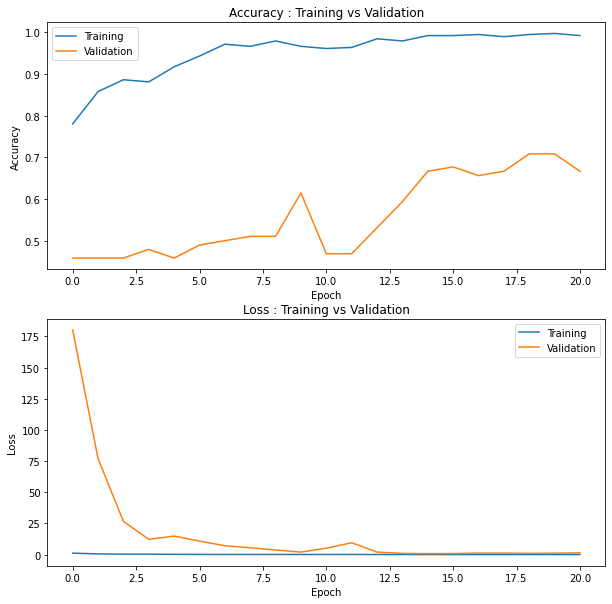

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred_s = y_pred.argmax(axis=1)
y_pred_s.shape, y_pred_s[:30]

4/4 [==============================] - 2s 368ms/step


((122,),
 array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 1]))

In [ ]:
y_test[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# confusion matrix, accuracy, recall, precision, f1 score
from sklearn.metrics import *

print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_s))
print("accuracy_score:", accuracy_score(y_test, y_pred_s))
print("recall_score:", recall_score(y_test, y_pred_s))
print("precision_score:", precision_score(y_test, y_pred_s))
print("f1_score:", f1_score(y_test, y_pred_s))

confusion_matrix: 
 [[40 26]
 [ 7 49]]
accuracy_score: 0.7295081967213115
recall_score: 0.875
precision_score: 0.6533333333333333
f1_score: 0.7480916030534351


In [ ]:
len(x_test), len(y_test)

(122, 122)

id = 101
모델의 카테고리별 확률 : 
{'normal': 100.0, 'abnormal': 0.0}


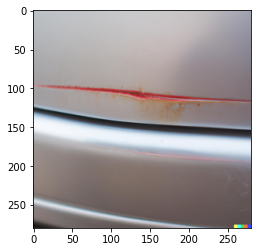

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''
import random as rd

labels = {0: "normal", 1: "abnormal"}
id = rd.randrange(0,121)

print(f'id = {id}')

prob = np.floor(y_pred[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)


plt.imshow(x_test[id])
plt.show()

### (2) Transfer Learning
- **세부요구사항**
    * VGG16 모델은 1000개의 클래스를 분류하는 데 사용된 ImageNet 데이터셋을 기반으로 사전 학습된 가중치를 가지고 있습니다. 
        * 따라서 이 모델은 이미지 분류 문제에 대한 높은 성능을 보입니다.
        * 이 모델은 보통 전이학습(transfer learning)에서 기본적으로 사용되며, 특히 대규모 데이터셋이 없을 때는 기본 모델로 사용되어 fine-tuning을 수행합니다.
    * VGG16 함수로 부터 base_model 저장


In [ ]:
from tensorflow.keras.applications import VGG16

#### 1) VGG16 불러와서 저장하기
* include_top=False로 설정하여 분류기를 제외하고 미리 학습된 가중치 imagenet을 로드합니다.
* .trainable을 True로 설정하여 모델의 모든 레이어들이 fine-tuning에 대해 업데이트되도록 합니다.


In [ ]:
base_model = VGG16(                 )




#### 2) VGG16과 연결한 구조 설계
* VGG16을 불러와서 Flatten, Dense 등으로 레이어 연결하기

#### 3) 학습
- **세부요구사항**
    - 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
    - 데이터
        * Image Generator를 연결하거나
        * 기존 train, validation 셋을 이용해도 됩니다.
        - Early Stopping을 반드시 사용하세요.
        - 최적의 가중치를 모델에 적용하세요.

#### 4) 성능 평가